In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Notebook显示完整的列
pd.set_option("max_columns",50)

#读取数据
data=pd.read_csv("D:\BaiduYunDownload\python数据分析与机器学习实战\python数据分析与机器学习实战\课程资料\唐宇迪-机器学习课程资料\补充的内容\贷款利润最大化\LoanStats3a.csv",engine='python',skiprows=1)

#删除空白特征
data.drop(data.columns[49:],axis=1,inplace=True)

#删除后验特征
data = data.drop(["id", "member_id", "funded_amnt", "funded_amnt_inv", "emp_title", "issue_d","url","desc","title","zip_code",
                  "addr_state","earliest_cr_line","last_pymnt_d","mths_since_last_delinq","mths_since_last_record","next_pymnt_d",
                  "out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","initial_list_status","pub_rec",
                  "total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_amnt","pymnt_plan",
                  "last_credit_pull_d","sub_grade"], axis=1)

#删除缺失值
data.dropna(inplace=True)

#保留Fully Paid与Charged Off数据
data=data[(data["loan_status"]=="Fully Paid") | (data["loan_status"]=="Charged Off")]

#映射贷款状态，标记Fully Paid为1，Charged Off为0
loan_status_replace={"loan_status" : {"Fully Paid": 1,"Charged Off": 0,}}
data=data.replace(loan_status_replace)

#映射工作年限
emp_length_replace={"emp_length": {
        "10+ years": 4,
        "9 years": 4,
        "8 years": 3,
        "7 years": 3,
        "6 years": 3,
        "5 years": 2,
        "4 years": 2,
        "3 years": 2,
        "2 years": 1,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0,
    }
}
data=data.replace(emp_length_replace)

#去百分号
data["int_rate"]=data["int_rate"].str.rstrip("%").astype("float")
data["revol_util"]=data["revol_util"].str.rstrip("%").astype("float")


data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38440 entries, 0 to 39785
Data columns (total 18 columns):
loan_amnt              38440 non-null float64
term                   38440 non-null object
int_rate               38440 non-null float64
installment            38440 non-null float64
grade                  38440 non-null object
emp_length             38440 non-null int64
home_ownership         38440 non-null object
annual_inc             38440 non-null float64
verification_status    38440 non-null object
loan_status            38440 non-null int64
purpose                38440 non-null object
dti                    38440 non-null float64
delinq_2yrs            38440 non-null float64
inq_last_6mths         38440 non-null float64
open_acc               38440 non-null float64
revol_bal              38440 non-null float64
revol_util             38440 non-null float64
total_acc              38440 non-null float64
dtypes: float64(11), int64(2), object(5)
memory usage: 4.8+ MB


In [2]:
data.describe()

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc
count,38440.000000,38440.000000,38440.000000,38440.000000,3.844000e+04,38440.000000,38440.000000,38440.00000,38440.000000,38440.000000,38440.000000,38440.000000,38440.000000
mean,11272.142300,12.032240,326.544208,2.230619,6.962605e+04,0.859183,13.321058,0.14693,0.870525,9.320057,13457.235146,48.937137,22.133975
std,7445.707404,3.708382,209.052147,1.345227,6.433407e+04,0.347837,6.665137,0.49225,1.070727,4.395564,15934.393084,28.312670,11.399792
min,500.000000,5.420000,15.690000,0.000000,4.000000e+03,0.000000,0.000000,0.00000,0.000000,2.000000,0.000000,0.000000,2.000000
25%,5500.000000,9.250000,168.430000,1.000000,4.149900e+04,1.000000,8.200000,0.00000,0.000000,6.000000,3744.750000,25.600000,14.000000
50%,10000.000000,11.860000,282.440000,2.000000,6.000000e+04,1.000000,13.410000,0.00000,1.000000,9.000000,8930.000000,49.400000,20.000000
75%,15000.000000,14.540000,433.720000,4.000000,8.319525e+04,1.000000,18.590000,0.00000,1.000000,12.000000,17137.000000,72.500000,29.000000
max,35000.000000,24.590000,1305.190000,4.000000,6.000000e+06,1.000000,29.990000,11.00000,8.000000,44.000000,149588.000000,99.900000,90.000000


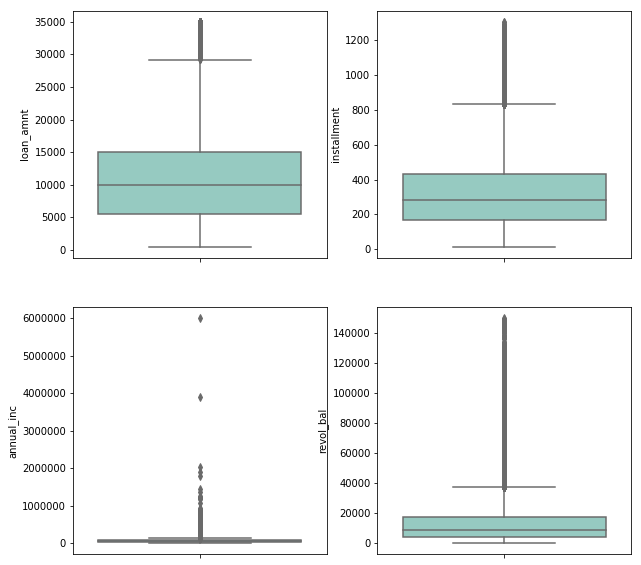

In [3]:
#部分特征箱线图
import seaborn as sns
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(2,2,1)
sns.boxplot(data["loan_amnt"],orient="v",palette="Set3")
ax2=fig.add_subplot(2,2,2)
sns.boxplot(data["installment"],orient="v",palette="Set3")
ax3=fig.add_subplot(2,2,3)
sns.boxplot(data["annual_inc"],orient="v",palette="Set3")
ax4=fig.add_subplot(2,2,4)
sns.boxplot(data["revol_bal"],orient="v",palette="Set3")

In [4]:
#去除annual_incom异常值（两个3900000和6000000）：annual<3000000即可
data=data[data["annual_inc"]<3000000]
data.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc
0,5000.0,36 months,10.65,162.87,B,4,RENT,24000.0,Verified,1,credit_card,27.65,0.0,1.0,3.0,13648.0,83.7,9.0
1,2500.0,60 months,15.27,59.83,C,0,RENT,30000.0,Source Verified,0,car,1.00,0.0,5.0,3.0,1687.0,9.4,4.0
2,2400.0,36 months,15.96,84.33,C,4,RENT,12252.0,Not Verified,1,small_business,8.72,0.0,2.0,2.0,2956.0,98.5,10.0
3,10000.0,36 months,13.49,339.31,C,4,RENT,49200.0,Source Verified,1,other,20.00,0.0,1.0,10.0,5598.0,21.0,37.0
5,5000.0,36 months,7.90,156.46,A,2,RENT,36000.0,Source Verified,1,wedding,11.20,0.0,3.0,9.0,7963.0,28.3,12.0


loan_amnt:     申请额度  

installment：   月还款额

int_rate:      贷款利率  

dti:         每月总还款额（不包括按揭和LC）/月收入

delinq_2yrs：   过去2年逾期30天以上的违约次数     

inq_last_6mths： 过去六个月的查询次数(不包括汽车及按揭贷款查询) 

open_acc：     开放信用额度数量                     

revol_bal：    信贷循环总余额

revol_util：    借款人使用的相对于所有可用循环信贷的信贷金额

total_acc：	   当前信用额度总数

In [5]:
#2年内逾期30天以上次数与贷款状态交叉表
pd.crosstab(data["loan_status"],data["delinq_2yrs"])

delinq_2yrs,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,11.0
loan_status,,,,,,,,,,,
0,4748,490,124,32,13,3,1,1,1,0,0
1,29498,2729,537,182,46,18,9,3,1,1,1


In [6]:
#观察2年内逾期30天以上次数大于6次的记录
data[data['delinq_2yrs']>6]

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc
15079,4200.0,36 months,15.62,146.88,D,1,RENT,35000.0,Not Verified,1,medical,9.70,8.0,2.0,10.0,478.0,79.7,19.0
15250,8875.0,36 months,16.89,315.94,D,2,RENT,38000.0,Verified,1,credit_card,19.93,7.0,0.0,5.0,822.0,74.7,17.0
15519,5600.0,60 months,18.39,143.40,E,4,RENT,67200.0,Source Verified,0,small_business,13.54,7.0,1.0,9.0,820.0,7.5,25.0
15905,5000.0,36 months,14.79,172.82,C,4,MORTGAGE,130000.0,Verified,1,other,8.82,9.0,2.0,7.0,1796.0,17.1,32.0
18388,5000.0,36 months,10.74,163.08,B,2,RENT,53000.0,Source Verified,1,moving,9.74,11.0,3.0,16.0,2357.0,8.3,21.0
19134,12000.0,60 months,18.62,308.79,F,3,OWN,50004.0,Not Verified,1,major_purchase,16.61,7.0,1.0,10.0,6970.0,55.3,27.0
19552,12000.0,60 months,18.25,306.36,F,2,RENT,67200.0,Source Verified,0,car,12.11,8.0,1.0,7.0,2409.0,65.1,17.0
25099,3000.0,36 months,13.61,101.97,C,4,RENT,60500.0,Verified,1,wedding,4.15,7.0,1.0,8.0,1326.0,16.0,26.0


D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


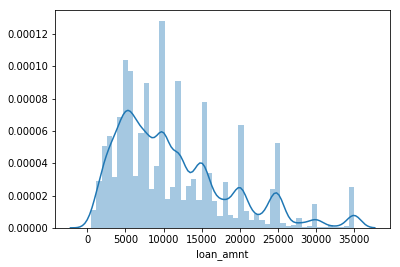

In [7]:
#贷款额度分布区间
import seaborn as sns
sns.distplot(data['loan_amnt'])

贷款额度多集中于500-15000之间，每5000的倍数时都会出现峰值

贷款按照等额本息方式

月还款额=x*y*(1+y)^n/((1+y)^n-1)

x为借款总额  y为月利率  n为借款月数

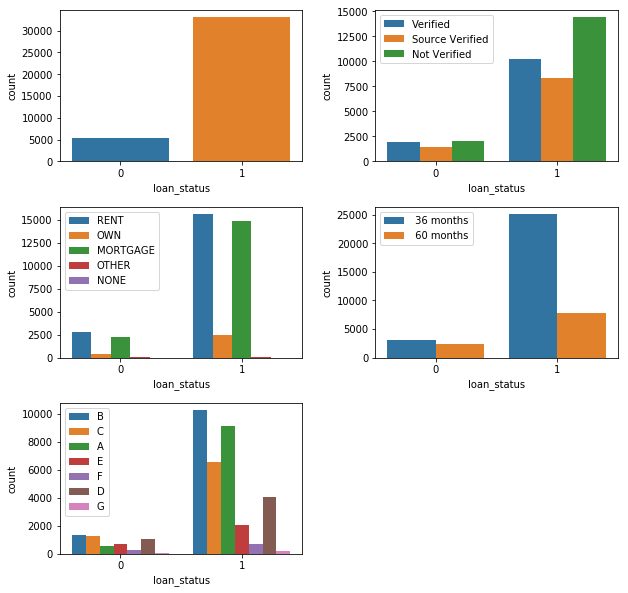

In [8]:
import seaborn as sns
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(3,2,1)
sns.countplot(data["loan_status"])
ax2=fig.add_subplot(3,2,2)
sns.countplot(data['loan_status'],hue=data["verification_status"])
ax2.legend(loc="best")
ax3=fig.add_subplot(3,2,3)
sns.countplot(data['loan_status'],hue=data["home_ownership"])
ax3.legend(loc="best")
ax4=fig.add_subplot(3,2,4)
sns.countplot(data['loan_status'],hue=data["term"])
ax4.legend(loc="best")
ax5=fig.add_subplot(3,2,5)
sns.countplot(data['loan_status'],hue=data["grade"])
ax5.legend(loc="best")
plt.subplots_adjust(wspace=0.3,hspace=0.3)

划分等级低的放款成功率低，分期数越多的放款成功率越低。

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

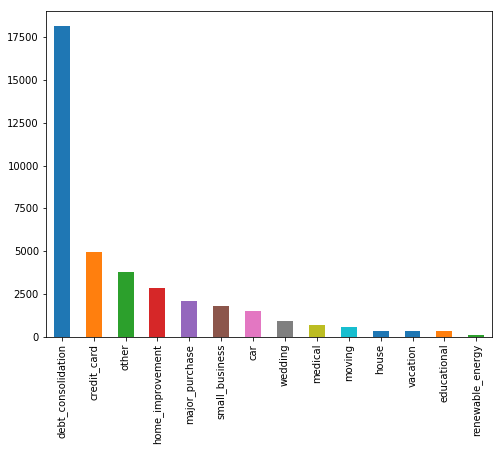

In [9]:
#贷款用途
plt.figure(figsize=(8,6))
(data["purpose"]).value_counts().plot(kind="bar")
plt.xticks(rotation=90)

多数人贷款用于债务合并，信用卡，改善生活等。

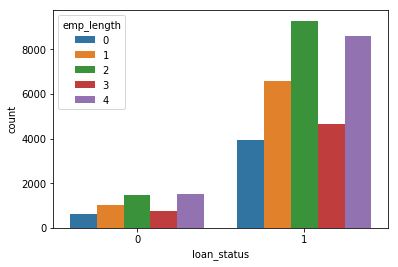

In [10]:
sns.countplot(data["loan_status"],hue=data["emp_length"])

放款与未放款分布一致，工作3-5年与9年以上贷款需求量较大，可能与结婚买房买车生子相关。

In [11]:
#类别特征独热编码
catg_fs=["home_ownership", "verification_status", "purpose", "term","grade"]
dummy1=pd.get_dummies(data[catg_fs])
dummy2=pd.get_dummies(data["emp_length"],prefix="emp_length")
dummy=pd.concat([dummy1,dummy2],axis=1)

#合并数据集，删除类别特征原有列
data=pd.concat([data,dummy],axis=1)
data.drop(catg_fs,axis=1,inplace=True)
data.drop("emp_length",axis=1,inplace=True)
data.head()

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_0,emp_length_1,emp_length_2,emp_length_3,emp_length_4
0,5000.0,10.65,162.87,24000.0,1,27.65,0.0,1.0,3.0,13648.0,83.7,9.0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2500.0,15.27,59.83,30000.0,0,1.00,0.0,5.0,3.0,1687.0,9.4,4.0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
2,2400.0,15.96,84.33,12252.0,1,8.72,0.0,2.0,2.0,2956.0,98.5,10.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,10000.0,13.49,339.31,49200.0,1,20.00,0.0,1.0,10.0,5598.0,21.0,37.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
5,5000.0,7.90,156.46,36000.0,1,11.20,0.0,3.0,9.0,7963.0,28.3,12.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0


In [12]:
x=data.drop(["loan_status"],axis=1)
y=data["loan_status"]

#逻辑回归建模
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x,y)
y_pre=lr.predict(x)

tp=len(y_pre[(data["loan_status"]==1)&(y_pre==1)])
tn=len(y_pre[(data["loan_status"]==0)&(y_pre==0)])
fp=len(y_pre[(data["loan_status"]==0)&(y_pre==1)])
fn=len(y_pre[(data["loan_status"]==1)&(y_pre==0)])

#精确率
tpr = tp / float((tp + fn))
#召回率
fpr = fp / float((fp + tn))

print(tpr)
print(fpr)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9992429977289932
0.9981525956031775


精确率与召回率均很高，是样本数量不均衡所致，需要平衡正负样本。

In [13]:
#逻辑回归+balanced
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, KFold
lr=LogisticRegression(class_weight="balanced")
kf=KFold(n_splits=5, random_state=1)
y_pre=cross_val_predict(lr, x, y, cv=kf)
y_pre=pd.Series(y_pre)

tp=len(y_pre[(data["loan_status"]==1)&(y_pre==1)])
tn=len(y_pre[(data["loan_status"]==0)&(y_pre==0)])
fp=len(y_pre[(data["loan_status"]==0)&(y_pre==1)])
fn=len(y_pre[(data["loan_status"]==1)&(y_pre==0)])

#精确率
tpr = tp / float((tp + fn))
#召回率
fpr = fp / float((fp + tn))

print(tpr)
print(fpr)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6087215499404351
0.5863793766833397


In [14]:
#逻辑回归+penalty
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, KFold
penalty = {
    0: 5,
    1: 1
}

lr=LogisticRegression(class_weight=penalty)
kf=KFold(n_splits=5, random_state=1)
y_pre=cross_val_predict(lr, x, y, cv=kf)
y_pre=pd.Series(y_pre)

tp=len(y_pre[(data["loan_status"]==1)&(y_pre==1)])
tn=len(y_pre[(data["loan_status"]==0)&(y_pre==0)])
fp=len(y_pre[(data["loan_status"]==0)&(y_pre==1)])
fn=len(y_pre[(data["loan_status"]==1)&(y_pre==0)])

#精确率
tpr = tp / float((tp + fn))
#召回率
fpr = fp / float((fp + tn))

print(tpr)
print(fpr)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.699260141701674
0.6875721431319738


In [15]:
#随机森林
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, KFold

rf=RandomForestClassifier(n_estimators=10,class_weight="balanced", random_state=1)
kf=KFold(n_splits=5, random_state=1)
y_pre=cross_val_predict(rf, x, y, cv=kf)
y_pre=pd.Series(y_pre)

tp=len(y_pre[(data["loan_status"]==1)&(y_pre==1)])
tn=len(y_pre[(data["loan_status"]==0)&(y_pre==0)])
fp=len(y_pre[(data["loan_status"]==0)&(y_pre==1)])
fn=len(y_pre[(data["loan_status"]==1)&(y_pre==0)])

#精确率
tpr = tp / float((tp + fn))
#召回率
fpr = fp / float((fp + tn))

print(tpr)
print(fpr)

0.9711894162643426
0.9672951135051943
